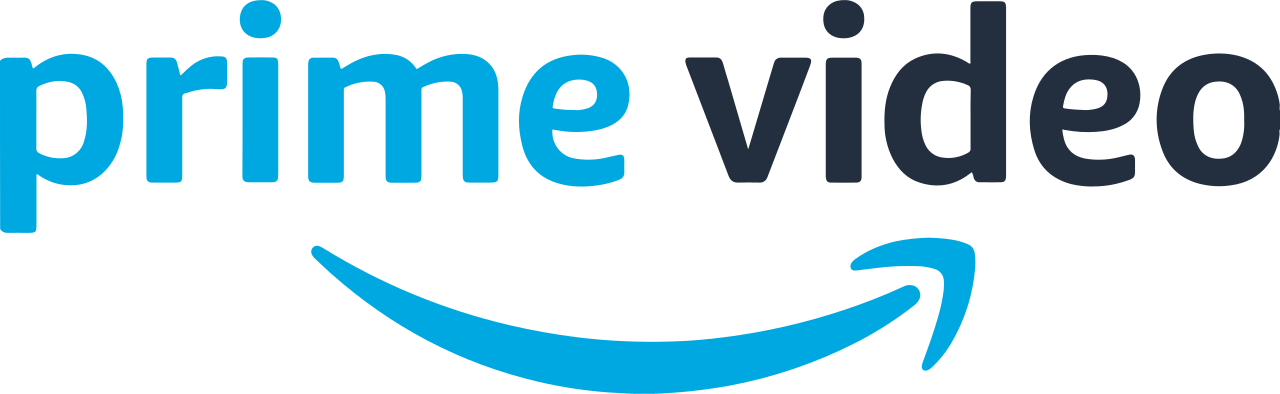

# PrimeTime: 
# An Amazon Prime Video <mark> Content Based </mark> Recommendation System
***


**Author:** <br />
Jawwad A. Siddiqui <br />
Data Scientist <br />


<nav>
<a href=”https://www.linkedin.com/in/jsiddiqui85/">LinkedIn</a> |
<a href=”https://github.com/jsiddiqui85">GitHub</a> |
<a href=”https://medium.com/@jsiddiqui85">Medium</a> 
</nav>
                              

# Table of Contents
***

1. [Business Understanding](#Business-Understanding)
2. [Overview](#Overview)
3. [Data](#Data)
4. [Library Imports](#Libary-Imports)
5. [Read in CSV Files](#Read-in-CSV-Files)
6. [Data Preperation](#Data-Preperation)

    - [Look At Both DataFrames](#Checkout-Both-DataFrames)
    - [Drop Columns](#Drop-Irrelevant-Columns-As-Well-As-Columns-That-Have-Too-Many-Null-Values)
    - [Drop Null Values](#Drop-Null-Values)
    - [Check & Drop Duplicates](#Check-For-and-Drop-Duplicates)
    - [Reformat Genres Column](#Reformat-genres-Column)
    - [One Hot Encode Genres Column](#Separate-genres-Column)
    - [Combine Names Column Into One Column](#Combine-Names-Into-One-Column)
    
    
7. [Data Pre-Processing](#Data-Pre-Processing)

    - [Describe Final Movies DataFrame](#Describe-final_movies_df)
    - [Impute Null Values](#Impute-The-imdb_score-Null-Values)
    - [Scale With MinMaxScaler](#Scale-Data-Using-MinMaxScaler)
    
    
8. [Recommender Function & Models](#Recommender-Function-&-Models)
    
    - [Cosine Similarity](#Cosine-Similarity)
    - [Building Recommender Function](#Building-Recommender-Function)
    - [Cosine Similarity Function](#Cosine-Similarity-Recommender-Function)
    - [K-Nearest Neighbors](#K-Neartest-Neighbors-(KNN))
    - [Model Results](#Model-Results)


9. [Conclusions](#Conclusions)
10. [Limitations](#Limitations)
11. [Next Steps](#Next-Steps)

# Business Understanding
***

Today's streaming landscape is vast and diverse, with many options for subscribers to watch their choice of entertainment.  There are about 1 billion users worldwide, generating over 500 billion dollars in revenue.  Amazon Prime Video currently holds about 18% of streaming market share compared to its competitors Netflix with 25%, HBO Max with 17%, Hulu with 14% and Disney Plus with 14%.  People subscribed to Amazon Prime's 2-day delivery service automatically have the privilege to stream all of the content available on their streaming service, Amazon Prime Video.  As of 2021, over 175 million Amazon Prime users streamed films or television shows in the past year.  Even though Amazon has been seeing strong total streaming hours, it has been gradually losing its current customer base to its competitors.  With an improved recommendation system, Amazon believes it will have a better chance at retaining their current subscriber base and they have set out to make it the best in the industry.

In 2019 Amazon hired a lot of Data Scientists and Data Engineers to try an improve their recommendation algorithms in an attempt to provide twice as good recommendations for movies and TV shows on their Amazon Prime Video service.  Although, they were able to improve their recommendations, this new *collaborative filtering* approach still fell short of their expectations.  The collaborative approach deemed to recommend content based on how a user was interacting with the current content available (based on *user history* of movie and shows previously watched by *similar users*) but it failed to address recommending content based on similar movies and shows a user already watched or like to watch.  

As Amazon's computing resources grew, the company wanted to begin using algorithms to leverage all of this new data that they had collected on their users.  Recently, Amazon hired Data Engineers and Data Scientist's to test new technologies to recommend video products on their streaming service Amazon Prime Video.  Although the new approaches leveraging neural networks and other various types of machine learning appeared to be promising, none of them actually worked as they were expecting. In fact, many of these artificial intelligence approaches not only performed worse than the collaborative filtering but it seemed that the company's original approach of using human curation and lists found on Google performed better.

At this point, Amazon has decided to seek out Data Scientists who are willing to take a look inside the black box of machine learning to figure out the best approach for providing recommendations to their Amazon Prime Video subscribers.

# Overview
***

This project leverages the entire Amazon Prime Video database to provide a *content based filtering* recommendation system to their current subscribers.  Currently, Amazon Prime Video ranks second in content streaming services when compared to its competitors Netflix and Hulu.  Although they hold part of the streaming service market, they would like to readjust themselves in the market by retaining their current subscriber base by leveraging an improved recommendation system for their current subscribers.

In order to address the problem that Amazon has posed, I have used the following two content specific models to improve on Amazon's currently collaborative filtering algorithm:

    1. Cosine Similarity
    2. K-Nearest Neighbors 
    
Both of these algorithms (models) that I used are trained on the *entire dataset*.  They use movie features such as the movie title, content type (movie or show), movie release year, movie length (runtime), and each movie's IMDB score to provide a more curated recommendation experience for the Amazon Prime Video user.

# Data
***

This data was found and downloaded from **Kaggle.com** which was acquired and put together in May of 2022 containing data available in the United States market. 

The dataset includes over roughly **9,000** movie and show titles currently available to stream on Amazon Prime Video. In addition, there are over **124,000** credits of actors and directors.  Both movie/show titles and actors/director names are matched up using the <mark>JustWatch Movie ID</mark>.

Amazon Prime Video titles are distributed within 15 columns with information including:

- ID: The title ID on JustWatch.
- title: The name of the title.
- show type: TV show or movie.
- description: A brief description.
- release year: The release year.
- age certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW.
- IMDB ID: The title ID on IMDB.
- IMDB Score: Score on IMDB.
- IMDB Votes: Votes on IMDB.
- TMDB Popularity: Popularity on TMDB.
- TMDB Score: Score on TMDB.

Actors and directors have a total of 5 columns including:

- person ID: The person ID on JustWatch.
- ID: The title ID on JustWatch.
- name: The actor or director's name.
- character name: The character name.
- role: ACTOR or DIRECTOR.

This Amazon Prime Video dataset can be downloaded [HERE](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies)


# Library Imports
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from nltk.tokenize import RegexpTokenizer

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Read in CSV Files
***

In [2]:
credits_df = pd.read_csv('./Data/credits.csv')

In [3]:
titles_df = pd.read_csv('./Data/titles.csv')

# Data Preperation
***

This segment will illustrate my methodology behind munging the data, getting it ready to be pre-processed for modeling.

#### Checkout Both DataFrames

In [4]:
# Looking at titles DataFrame
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [5]:
# Looking at the value counts of title_df
titles_df['title'].value_counts()

Cinderella                        3
Dynamite                          3
Little Men                        3
The Hound of the Baskervilles     3
Mind Games                        3
                                 ..
Vikings                           1
Chi-Raq                           1
Combat Wombat                     1
Jonestown: Paradise Lost          1
Jim Gaffigan: The Pale Tourist    1
Name: title, Length: 9737, dtype: int64

In [6]:
# Looking at the titles
titles_df['title']

0                     The Three Stooges
1                           The General
2           The Best Years of Our Lives
3                       His Girl Friday
4                     In a Lonely Place
                     ...               
9866                       Lily Is Here
9867    Jay Nog: Something from Nothing
9868                            Chasing
9869                           Baikunth
9870                   Waking Up Eighty
Name: title, Length: 9871, dtype: object

In [7]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

There are a total of 9,871 rows in this DataFrame

In [8]:
# Check for any null values in the DataFrame
titles_df.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

As you can see the `title` column does not have any null values making it easier to predict which titles I can recommend. My predictor feature `genres` also does not have any null values therefore, I will use these two features to create my MVP models and base my recommendations.  If time premits, I will incorporate some rating scores such as `imdb_score` and/or `tmdb_popularity`.

In [9]:
# Check to see if there are any duplicated movie titles
titles_df['title'].duplicated().sum()

134

In [10]:
# Drop all of the duplicated movie titles
titles_df.drop_duplicates(subset='title', inplace=True)

In [11]:
# Sanity check to ensure all duplicated movie titles were dropped
titles_df['title'].duplicated().sum()

0

In [12]:
# Looking at Credits DataFrame
credits_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [13]:
# Check the shape of the credits_df DataFrame
credits_df.shape

(124235, 5)

In [14]:
# Check for any null values in the DataFrame
credits_df.isna().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [15]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


### Merge DataFrames

After taking a look at both the `titles_df` and `credits_df` it is clear that I will have to merge both of these dataframes together.  I am merging on `id` which is the movie/show title on JustWatch.  Ideally, I would like to create a recommendation system that will include and allow someone to choose a director as one of the inputs to receive recommendations based off of. Additional inputs would include being able to receive recommendations based off of `genres` or `imdb_score`.

In [16]:
# Merge both title and credit dataframes together
movies_df = titles_df.merge(credits_df, on='id', how='outer')

In [17]:
# Sanity check to ensure the merge was successful
movies_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926.0,NaN,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926.0,NaN,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125224,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962387.0,Kirbi Simon,Kirbi,ACTOR
125225,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795241.0,Scott Lane,Scott,ACTOR
125226,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026818.0,Luke Walker,NaN,DIRECTOR
125227,tm1038144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962569.0,Kandi Thompson,NaN,DIRECTOR


In [18]:
# Take a look at all the columns after merge
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125229 entries, 0 to 125228
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125229 non-null  object 
 1   title                 123483 non-null  object 
 2   type                  123483 non-null  object 
 3   description           123295 non-null  object 
 4   release_year          123483 non-null  float64
 5   age_certification     55959 non-null   object 
 6   runtime               123483 non-null  float64
 7   genres                123483 non-null  object 
 8   production_countries  123483 non-null  object 
 9   seasons               8387 non-null    float64
 10  imdb_id               118345 non-null  object 
 11  imdb_score            117376 non-null  float64
 12  imdb_votes            117347 non-null  float64
 13  tmdb_popularity       122936 non-null  float64
 14  tmdb_score            112565 non-null  float64
 15  

In [19]:
# Take a look at all the null values in the combined dataframe
movies_df.isna().sum()

id                           0
title                     1746
type                      1746
description               1934
release_year              1746
age_certification        69270
runtime                   1746
genres                    1746
production_countries      1746
seasons                 116842
imdb_id                   6884
imdb_score                7853
imdb_votes                7882
tmdb_popularity           2293
tmdb_score               12664
person_id                  994
name                       994
character                17281
role                       994
dtype: int64

### Drop Irrelevant Columns As Well As Columns That Have Too Many Null Values

Since `age_certification` has about 70k null values, that will be the first column I drop.  Next, the number of `seasons` has over 100k in null values which will make it difficult to compare that with any other column in the dataframe.  

Since I would like to recommend `title` of movies, what `type` they are (whether it is a TV Show or Movie), the `release_year` of each title, `runtime`, `genres`, and `imdb_score` would all be either input or outputs for my recommendation system - these columns will remain in the dataframe.  

However, `age_certification` (due to 70k null values), `production_countries` (because I believe this is irrelevant to my recommendation system), as well as the following columns will all be removed: `description`, `imdb_id`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`, `person_id`, and `character`.

In [20]:
movies_df = movies_df.drop(['description',
                            'age_certification',
                            'production_countries',
                            'seasons',
                            'imdb_id',
                            'imdb_votes',
                            'tmdb_popularity',
                            'tmdb_score',
                            'person_id',
                            'character'], axis=1)

In [21]:
# Check dataframe to see if columns were dropped
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Marion Mack,ACTOR


In [22]:
# Check the columns and feature types
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125229 entries, 0 to 125228
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            125229 non-null  object 
 1   title         123483 non-null  object 
 2   type          123483 non-null  object 
 3   release_year  123483 non-null  float64
 4   runtime       123483 non-null  float64
 5   genres        123483 non-null  object 
 6   imdb_score    117376 non-null  float64
 7   name          124235 non-null  object 
 8   role          124235 non-null  object 
dtypes: float64(3), object(6)
memory usage: 9.6+ MB


In [23]:
# Check for null values after the columns were dropped
movies_df.isna().sum()

id                 0
title           1746
type            1746
release_year    1746
runtime         1746
genres          1746
imdb_score      7853
name             994
role             994
dtype: int64

### Drop Null Values

Since `title`, `type`, `release_year`, `runtime`, `genres` only have 1,746 null values and `name` and `role` with 994 null values - I am going to drop those values from the dataset.  

However, `imdb_score` has a higher null value count with 7,853 - I will have to apply an imputer of some kind to deal with these null values.  I am most likely going to apply a KNN imputer to fill the null values with a more representative value. In addition, I will keep the null values in the `description` column because I am going to use NLP (Natural Language Processing) to parse through all the words.

In [24]:
movies_df = movies_df.dropna(axis=0, subset=['title','type','release_year','runtime','genres','name','role'])

In [25]:
# Check to ensure nulls are dropped from the correct columns, imdb_score should remain intact
movies_df.isna().sum()

id                 0
title              0
type               0
release_year       0
runtime            0
genres             0
imdb_score      5795
name               0
role               0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Please Note:</b>
 
- `imdb_score` null values were *not* dropped because I feel that 5,795 values are significant enough to keep allowing this dataset to show the full picture of the relationship of scores VS movies. Therefore, I will be *imputing* the null values in this column in the next section: Data Preprocessing.  
</div>

In [26]:
# Checking the shape of my dataframe
movies_df.shape

(122489, 9)

### Check For and Drop Duplicates

In [27]:
# Check dataframe for duplicates
movies_df.duplicated().sum()

252

There are a total of **252 unique** duplicates within the `movies_df` and will be dropped.

In [28]:
# Take a look at which items are duplicated
movies_df[movies_df.duplicated()]

,id,title,type,release_year,runtime,genres,imdb_score,name,role
1705,tm77319,Santa Fe Trail,MOVIE,1940.0,110.0,"['western', 'war', 'drama', 'history', 'romance']",6.2,Jack Deery,ACTOR
1872,tm4525,He Walked by Night,MOVIE,1949.0,79.0,"['thriller', 'crime']",7.1,Thomas Browne Henry,ACTOR
4424,tm73200,Li'l Abner,MOVIE,1940.0,78.0,"['comedy', 'romance']",4.9,Buster Keaton,ACTOR
6049,tm85300,Outlaws of the Desert,MOVIE,1941.0,66.0,"['western', 'action']",5.8,Bill Nestell,ACTOR
6220,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR
...,...,...,...,...,...,...,...,...,...
121107,tm1103576,Bhramam,MOVIE,2021.0,152.0,"['thriller', 'crime']",5.7,Shine Tom Chacko,ACTOR
121672,tm1043367,Open Your Eyes,MOVIE,2021.0,99.0,"['horror', 'thriller', 'drama']",4.2,Suzy Giannakopoulos,ACTOR
121742,tm1104220,My Best Worst Adventure,MOVIE,2021.0,85.0,[],7.8,Claudia Templeton,ACTOR
122740,tm1040662,Eternity,MOVIE,2021.0,45.0,['drama'],NaN,Crystal Jones,ACTOR


In [29]:
# Checking one unique value to determine if there are actual duplicates
movies_df[(movies_df['id'] == 'tm54261') & (movies_df['name'] == 'Sam Lufkin') ]

,id,title,type,release_year,runtime,genres,imdb_score,name,role
6219,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR
6220,tm54261,Indiscreet,MOVIE,1931.0,92.0,"['drama', 'romance', 'comedy']",6.2,Sam Lufkin,ACTOR


I wanted to double check this because some movies may have multiple actors within the `role` column for the same `title` of movie.  It appears that the 252 duplicates are *actually* dupicated values, therefore, I will be dropping *all* 252 duplicates.    

In [30]:
# Dropping all of the duplicated values
movies_df = movies_df.drop_duplicates()

In [31]:
# Checking to ensure all duplicated items have been removed
movies_df.duplicated().sum()

0

In [32]:
# Rechecking the shape of my dataframe
movies_df.shape

(122237, 9)

### Reformat `genres` Column

I chose to reformat the `genres` column so that it would be easier for a user to select genres when looking for recommendations.

In [33]:
# Take a look at movies_df to determine which characters I want to remove from genres column
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"['comedy', 'family', 'animation', 'action', 'f...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"['action', 'drama', 'war', 'western', 'comedy'...",8.2,Marion Mack,ACTOR


I used the `.replace` method and chained them together in *one* list comprehension to remove all of the unnecessary characters from the `genres` column.  (Having one list comprehension makes for easier readability)

In [34]:
movies_df['genres'] = [row.strip().replace('[','').replace("'",'').replace(']','') for row in movies_df['genres']]

In [35]:
# Sanity check to ensure the unwanted characters were removed
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Moe Howard,ACTOR
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"comedy, family, animation, action, fantasy, ho...",8.6,Larry Fine,ACTOR
3,tm19248,The General,MOVIE,1926.0,78.0,"action, drama, war, western, comedy, european",8.2,Buster Keaton,ACTOR
4,tm19248,The General,MOVIE,1926.0,78.0,"action, drama, war, western, comedy, european",8.2,Marion Mack,ACTOR


Since I am creating a **content-based filtering recommendation system**, I have created a dataframe which will represent the *important characteristics* of each movie.  Since each movie will represent an item in a profile, then its actors, director, release year, runtime, genre, along with the IMDB score represent the significant features of that movie.  

### Separate `genres` Column

In this section, I took the `genres` column and split each genre into its own individual/separate column.  Each *new* column of `genres` will include an assignment of either **1** or **0**, where 1 will indicate that this genre is included in this particular movie `title` or 0 indicating that the genre *is not* included in this movie `title`.

In [36]:
# Use tokenizer to split each genre name into an individual string
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)
movies_df['genres'] = [tokenizer.tokenize(token) for token in movies_df['genres']]

By using the `tokenizer` in the cell above, it is now in the correct format I need it to be to create a new `flat_list` that includes each genre in list format.

In the below two cells, I have created a new list of genres called `flat_list` which has each genre broken out into its own in a list format.  This will let me iterate over each `genre`, creating new columns with each individual genre, then assigning a value of 1 or 0 to indicate if that genre is in the `genres` column. 

In [37]:
# Create flat_list 
flat_list = [item for sublist in movies_df['genres'] for item in sublist]

In [38]:
# Set that flat_list to be a list
flat_list = list(set(flat_list))
flat_list

['horror',
 'romance',
 'history',
 'reality',
 'documentation',
 'sport',
 'family',
 'war',
 'fantasy',
 'music',
 'action',
 'european',
 'scifi',
 'drama',
 'comedy',
 'western',
 'animation',
 'thriller',
 'crime']

In [39]:
# Creating for loop to loop over each genre, creating separate column for each genre, and assigning True or False
for genre in flat_list:
    movies_df[genre]=[1 if genre in movie else 0 for movie in movies_df['genres']]

In [40]:
# Sanity check to ensure the for loop worked
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role,horror,...,music,action,european,scifi,drama,comedy,western,animation,thriller,crime
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Joe Besser,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Moe Howard,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Larry Fine,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
3,tm19248,The General,MOVIE,1926.0,78.0,"[action, drama, war, western, comedy, european]",8.2,Buster Keaton,ACTOR,0,...,0,1,1,0,1,1,1,0,0,0
4,tm19248,The General,MOVIE,1926.0,78.0,"[action, drama, war, western, comedy, european]",8.2,Marion Mack,ACTOR,0,...,0,1,1,0,1,1,1,0,0,0


In [41]:
movies_df['genres'].astype('string')

0         ['comedy', 'family', 'animation', 'action', 'f...
1         ['comedy', 'family', 'animation', 'action', 'f...
2         ['comedy', 'family', 'animation', 'action', 'f...
3         ['action', 'drama', 'war', 'western', 'comedy'...
4         ['action', 'drama', 'war', 'western', 'comedy'...
                                ...                        
123477                                  ['family', 'drama']
123478                                  ['family', 'drama']
123479                                  ['family', 'drama']
123480                                  ['family', 'drama']
123481                                  ['family', 'drama']
Name: genres, Length: 122237, dtype: string

In [42]:
movies_df['genres'].replace("[","", inplace=True)

In [43]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122237 entries, 0 to 123481
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             122237 non-null  object 
 1   title          122237 non-null  object 
 2   type           122237 non-null  object 
 3   release_year   122237 non-null  float64
 4   runtime        122237 non-null  float64
 5   genres         122237 non-null  object 
 6   imdb_score     116446 non-null  float64
 7   name           122237 non-null  object 
 8   role           122237 non-null  object 
 9   horror         122237 non-null  int64  
 10  romance        122237 non-null  int64  
 11  history        122237 non-null  int64  
 12  reality        122237 non-null  int64  
 13  documentation  122237 non-null  int64  
 14  sport          122237 non-null  int64  
 15  family         122237 non-null  int64  
 16  war            122237 non-null  int64  
 17  fantasy        122237 non-nul

In [44]:
movies_df.head()

,id,title,type,release_year,runtime,genres,imdb_score,name,role,horror,...,music,action,european,scifi,drama,comedy,western,animation,thriller,crime
0,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Joe Besser,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
1,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Moe Howard,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
2,ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,Larry Fine,ACTOR,1,...,0,1,0,0,0,1,0,1,0,0
3,tm19248,The General,MOVIE,1926.0,78.0,"[action, drama, war, western, comedy, european]",8.2,Buster Keaton,ACTOR,0,...,0,1,1,0,1,1,1,0,0,0
4,tm19248,The General,MOVIE,1926.0,78.0,"[action, drama, war, western, comedy, european]",8.2,Marion Mack,ACTOR,0,...,0,1,1,0,1,1,1,0,0,0


### Combine Names Into One Column

In this section, I took the actor/director names in the `name` column and combined them to be viewable in *one* row based on each movie `title`. First, I created a `cast_list_series` function that grouped each actor/director name together based on each movie `title`. Second, I dropped all duplicated values from my entire `movie_df` based on *each* unique movie `id`.  Third, I created the below for loop to loop over each movie `title` and `name`, replacing each name in the `name` column with my `cast_list_series` names.

In [45]:
# Create a function for cast_list_series that groups names individually by movie title
cast_list_series = movies_df.groupby('title')['name'].apply(','.join)

In [46]:
# Drop movie title duplicates by unique id
movies_df.drop_duplicates(subset='id', inplace=True)

In [47]:
# Create for loop to reassign cast_list_series to name column in movies_df
for movie_title in movies_df.title.unique():
    movies_df.loc[movies_df.title == movie_title, ['name']] = cast_list_series[movie_title] 

In [48]:
# Check last 10 rows to ensure all changes took affect
movies_df.tail(30)

,id,title,type,release_year,runtime,genres,imdb_score,name,role,horror,...,music,action,european,scifi,drama,comedy,western,animation,thriller,crime
123252,tm1019089,MAX: Live from the Greek Theatre,MOVIE,2021.0,42.0,[music],NaN,Max Schneider,ACTOR,0,...,1,0,0,0,0,0,0,0,0,0
123257,tm1072724,Trip to the Tax Paradise - Rumbo al Paraíso Fi...,MOVIE,2021.0,74.0,[music],NaN,"Antonio Bellido Marin,Oscar Carreras,Luisa Gil...",ACTOR,0,...,1,0,0,0,0,0,0,0,0,0
123268,tm996725,Kabadadaari,MOVIE,2021.0,146.0,"[crime, thriller, drama]",6.5,"Sibiraj,Nandita Swetha,Nassar,Jayaprakash,Suma...",ACTOR,0,...,0,0,0,0,1,0,0,0,1,1
123280,tm901122,The Bid,MOVIE,2021.0,90.0,[comedy],4.1,"Richard Harris,Maurquis Boone,Hakim Clark,Nafe...",ACTOR,0,...,0,0,0,0,0,1,0,0,0,0
123286,tm534294,Hal King,MOVIE,2021.0,114.0,"[drama, war]",6.3,"Kareem Ghaleb,J. Ivy,Sophia Stephens,Tarrey To...",ACTOR,0,...,0,0,0,0,1,0,0,0,0,0
123292,ts302433,Aham Bhramhasmi,SHOW,2021.0,25.0,[],NaN,"Chandni Rao,Abhay Bethiganti,Krishna Teja,Mounima",ACTOR,0,...,0,0,0,0,0,0,0,0,0,0
123297,tm1074422,27 September,MOVIE,2021.0,81.0,[drama],7.7,"Meenakshi Rai,Vinay Rai,Meenakshi Vinay Rai",ACTOR,0,...,0,0,0,0,1,0,0,0,0,0
123300,tm952811,Attraction to Paris,MOVIE,2021.0,112.0,"[action, crime, thriller]",3.5,"Christopher Atkins,Tara Reid,Dina De Laurentii...",ACTOR,0,...,0,1,0,0,0,0,0,0,1,1
123307,tm1062990,Chloe's Mountain,MOVIE,2021.0,107.0,"[family, drama]",4.1,"Kenzie Mae,Shalayna Janelle,Lynne Yeaman,Donna...",ACTOR,0,...,0,0,0,0,1,0,0,0,0,0
123317,tm515444,No Witnesses,MOVIE,2021.0,101.0,"[crime, thriller]",3.1,"Jacob Machin,Annie Wilson,Taya Calder-Mason,Ed...",ACTOR,0,...,0,0,0,0,0,0,0,0,1,1


In [49]:
# Recheck the shape of the entire dataframe
movies_df.shape

(8743, 28)

In [50]:
# Set the index of movies_df to the movie id
movies_df.set_index('id', inplace=True)

# Data Preprocessing 
***

<div class="alert alert-block alert-warning">
<b>Please Note:</b> 
    
- A `train_test_split` was not performed due to recommendation systems being unsupervised training models.
    
</div>

Before I begin my data preprocessing I am going to create a copy of my final dataframe, `model_df`, to be used for modeling purposes while ensuring the main dataframe isn't being touched during the modeling process.  Also, I will be dropping the `id`, `genres`, `title`, `type`, `release_year`, `runtime`, `name`, `role` columns since I will not need any of this information to run my Cosine Similarity Model.

In [51]:
# Create a copy of the final dataframe
model_df = movies_df.copy()

In [52]:
# Drop unneeded columns
model_df = model_df.drop(columns=['genres','title', 'type', 'release_year','runtime','name','role'])

A new DataFrame: `meta_df` has been created to ensure the original DataFrame remains untouched during the modeling process.

In [53]:
# Create meta_df
meta_df = movies_df.copy()

In [54]:
# Check the top 5 rows of meta_df
meta_df.head()

,title,type,release_year,runtime,genres,imdb_score,name,role,horror,romance,...,music,action,european,scifi,drama,comedy,western,animation,thriller,crime
id,,,,,,,,,,,,,,,,,,,,,
ts20945,The Three Stooges,SHOW,1934.0,19.0,"[comedy, family, animation, action, fantasy, h...",8.6,"Joe Besser,Moe Howard,Larry Fine",ACTOR,1,0,...,0,1,0,0,0,1,0,1,0,0
tm19248,The General,MOVIE,1926.0,78.0,"[action, drama, war, western, comedy, european]",8.2,"Buster Keaton,Marion Mack,Glen Cavender,Jim Fa...",ACTOR,0,0,...,0,1,1,0,1,1,1,0,0,0
tm82253,The Best Years of Our Lives,MOVIE,1946.0,171.0,"[romance, war, drama]",8.1,"Myrna Loy,Fredric March,Dana Andrews,Teresa Wr...",ACTOR,0,1,...,0,0,0,0,1,0,0,0,0,0
tm83884,His Girl Friday,MOVIE,1940.0,92.0,"[comedy, drama, romance]",7.8,"Cary Grant,Rosalind Russell,Ralph Bellamy,Gene...",ACTOR,0,1,...,0,0,0,0,1,1,0,0,0,0
tm56584,In a Lonely Place,MOVIE,1950.0,94.0,"[thriller, drama, romance]",7.9,"Humphrey Bogart,Gloria Grahame,Frank Lovejoy,C...",ACTOR,0,1,...,0,0,0,0,1,0,0,0,1,0


In [55]:
# Take a look at all columns in meta_df
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8743 entries, ts20945 to tm1054116
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          8743 non-null   object 
 1   type           8743 non-null   object 
 2   release_year   8743 non-null   float64
 3   runtime        8743 non-null   float64
 4   genres         8743 non-null   object 
 5   imdb_score     8055 non-null   float64
 6   name           8743 non-null   object 
 7   role           8743 non-null   object 
 8   horror         8743 non-null   int64  
 9   romance        8743 non-null   int64  
 10  history        8743 non-null   int64  
 11  reality        8743 non-null   int64  
 12  documentation  8743 non-null   int64  
 13  sport          8743 non-null   int64  
 14  family         8743 non-null   int64  
 15  war            8743 non-null   int64  
 16  fantasy        8743 non-null   int64  
 17  music          8743 non-null   int64  
 18  ac

### Describe `final_movies_df`

The descriptive statistics are important to know what the mean values are for each movie feature. This could be used to filter out movies that don't meet certain thresholds.

In [56]:
# Take a look at descriptive statistics
model_df.describe()

,imdb_score,horror,romance,history,reality,documentation,sport,family,war,fantasy,music,action,european,scifi,drama,comedy,western,animation,thriller,crime
count,8055.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000
mean,5.933656,0.114949,0.190552,0.040375,0.010980,0.101109,0.023219,0.073659,0.035343,0.059705,0.046437,0.197415,0.078120,0.074803,0.499142,0.315910,0.054672,0.042091,0.230013,0.135423
std,1.318993,0.318979,0.392759,0.196849,0.104216,0.301491,0.150606,0.261230,0.184655,0.236953,0.210442,0.398071,0.268375,0.263088,0.500028,0.464904,0.227353,0.200808,0.420865,0.342194
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Impute The `imdb_score` Null Values

Due to univariate methods (such as `SimpleImpute`) used for imputing missing values is a very simple way of estimating values (using mean, median, most-frequent), I do not feel this method is appropriate for answering my overall business problem.  For this reason, I have decided to use the `KNNImputer` since it helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix. 

- `KNNImputer` documentation found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
- Further explanation found [here](https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/)

First, I have created a new dataframe named `imdb_df` to filter into the `imdb_score` because the `KNNImputer` can only impute on a 2 dimensional array.

In [57]:
# Create a new dataframe filtering into imdb_score column
imdb_df = model_df.filter(['imdb_score'])
imdb_df

,imdb_score
id,
ts20945,8.6
tm19248,8.2
tm82253,8.1
tm83884,7.8
tm56584,7.9
...,...
tm822572,4.0
tm510327,5.3
tm1079144,NaN


In [58]:
# Instantiate KNNImputer
imputer = KNNImputer()

In [59]:
# Fit Transform KNNImputer on Training Set
imdb_imputed = imputer.fit_transform(imdb_df)

In [60]:
# Reassign final dataframe with imputed column
model_df['imdb_score'] = imdb_imputed

In [61]:
# Sanity check to ensure all of the nulls have been imputed
model_df.imdb_score.isna().sum()

0

In [62]:
# Reassign meta_df with imputed scores
meta_df['imdb_score'] = imdb_imputed

# Save meta_df as a CSV - to be used in Streamlit
meta_df.to_csv('meta_df.csv', index=False)

## Scale Data Using `MinMaxScaler`

Since most of the numbers in the `imdb_score` column are in different units, I am going to *normalize* the data using the `MinMaxScaler` so that everything is on the same scale.  By scaling all of the data, I can ensure my model will be able to learn more efficiently and weigh the different attributes similarly.

In addition, I chose to use `MinMaxScaler` over `StandardScaler` because the latter does not guarantee balanced feature scales while the `MinMaxScaler` scales all the data features in a range of 0 and 1.

In [63]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# Create a cols variable with the imdb_score column
cols = ['imdb_score']
# Fit and transform on training data
scaled = scaler.fit_transform(model_df[cols])

In [65]:
# Create new dataframe using scaled data
scaled_column_df = pd.DataFrame(data=scaled, index=model_df.index)

In [66]:
# Add the scaled imdb_score column back into the main DataFrame
model_df['imdb_score'] = scaled_column_df

# Save model_df as a CSV - to be used in Streamlit

model_df.to_csv('model_df.csv', index=False)

In [67]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8743 entries, ts20945 to tm1054116
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_score     8743 non-null   float64
 1   horror         8743 non-null   int64  
 2   romance        8743 non-null   int64  
 3   history        8743 non-null   int64  
 4   reality        8743 non-null   int64  
 5   documentation  8743 non-null   int64  
 6   sport          8743 non-null   int64  
 7   family         8743 non-null   int64  
 8   war            8743 non-null   int64  
 9   fantasy        8743 non-null   int64  
 10  music          8743 non-null   int64  
 11  action         8743 non-null   int64  
 12  european       8743 non-null   int64  
 13  scifi          8743 non-null   int64  
 14  drama          8743 non-null   int64  
 15  comedy         8743 non-null   int64  
 16  western        8743 non-null   int64  
 17  animation      8743 non-null   int64  
 18  th

# Recommender Function & Models
***

I have created a function that takes in a <mark>user-inputted</mark> movie title and a number of recommendations `(n_numbers)` and it returns the top movie recommendations.  As expected, a content-based system returns recommendations that follow closely along genre lines.  The movie title input is used to index the DataFrame based on the JustWatch `movie_id` (ID). All of the results that are returned are sorted in descending order based on each movie title score.  The `meta_df` DataFrame is used to index into the inputted movie title and return all of the information pertaining to the top recommendations

## Cosine Similarity

I am going to create a Cosine Similarity Matrix using my `model_df` that doesn't include the columns that are not needed for this particular model.  Then I am assigning this to a new DataFrame named `cosine_df` just to take a look at the similarity matrix.

In [68]:
cosine = cosine_similarity(model_df)
cosine_df = pd.DataFrame(data=cosine, index=model_df.index)
cosine_df

,0,1,2,3,4,5,6,7,8,9,...,8733,8734,8735,8736,8737,8738,8739,8740,8741,8742
id,,,,,,,,,,,,,,,,,,,,,
ts20945,1.000000,0.401825,0.137147,0.336031,0.133887,0.155775,0.600421,0.123819,0.338323,0.074577,...,0.328616,0.496157,0.158207,0.209809,0.338126,0.102853,0.141544,0.496157,0.158207,0.401436
tm19248,0.401825,1.000000,0.537450,0.535783,0.331910,0.631143,0.435499,0.325249,0.536913,0.338029,...,0.312848,0.490477,0.490477,0.498179,0.603666,0.466191,0.484695,0.490477,0.150616,0.394788
tm82253,0.137147,0.537450,1.000000,0.722559,0.723307,0.524500,0.587143,0.437843,0.724029,0.456029,...,0.417347,0.200925,0.660785,0.670271,0.453555,0.628929,0.653264,0.200925,0.200925,0.531164
tm83884,0.336031,0.535783,0.722559,1.000000,0.721308,0.519832,0.805934,0.434287,0.999940,0.455308,...,0.402411,0.656991,0.656991,0.663717,0.817570,0.627935,0.650328,0.656991,0.193734,0.525971
tm56584,0.133887,0.331910,0.723307,0.721308,1.000000,0.521411,0.585777,0.717468,0.722665,0.455563,...,0.407427,0.196149,0.658281,0.665932,0.453166,0.628287,0.651331,0.196149,0.196149,0.527726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm822572,0.102853,0.466191,0.628929,0.627935,0.628287,0.739697,0.508365,0.625860,0.628618,0.725087,...,0.312988,0.150683,0.983128,0.930815,0.723903,1.000000,0.991951,0.150683,0.150683,0.737635
tm510327,0.141544,0.484695,0.653264,0.650328,0.651331,0.766076,0.530543,0.644940,0.652310,0.719251,...,0.430730,0.207368,0.998377,0.969602,0.717133,0.991951,1.000000,0.207368,0.207368,0.768373
tm1079144,0.496157,0.490477,0.200925,0.656991,0.196149,0.228216,0.537737,0.181399,0.659546,0.109258,...,0.481434,1.000000,0.231778,0.307377,0.710327,0.150683,0.207368,1.000000,0.231778,0.243585


### Building Recommender Function

In this section, I going to begin building my recommendation system which will then be placed/combined into one function that will include all of these steps to provide a specified number of recommendations to the user.

In [69]:
# Input for movie title that returns the 'movie_title' index number for the movie to be used to call dataframe
title = input('Title: ')
movie1 = meta_df.index[meta_df['title'] == title]
movie1

Title: The General


Index(['tm19248'], dtype='object', name='id')

In [70]:
# Utilize cosine_similarity from sklearn to return similarity scores based on cosine distance
cos_sim = cosine_similarity(model_df)

# Create a dataframe with similairty scores with movie JustWatch ID ('id') as index
cos_sim = pd.DataFrame(data=cos_sim, index=model_df.index)
cos_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,8733,8734,8735,8736,8737,8738,8739,8740,8741,8742
id,,,,,,,,,,,,,,,,,,,,,
ts20945,1.000000,0.401825,0.137147,0.336031,0.133887,0.155775,0.600421,0.123819,0.338323,0.074577,...,0.328616,0.496157,0.158207,0.209809,0.338126,0.102853,0.141544,0.496157,0.158207,0.401436
tm19248,0.401825,1.000000,0.537450,0.535783,0.331910,0.631143,0.435499,0.325249,0.536913,0.338029,...,0.312848,0.490477,0.490477,0.498179,0.603666,0.466191,0.484695,0.490477,0.150616,0.394788
tm82253,0.137147,0.537450,1.000000,0.722559,0.723307,0.524500,0.587143,0.437843,0.724029,0.456029,...,0.417347,0.200925,0.660785,0.670271,0.453555,0.628929,0.653264,0.200925,0.200925,0.531164
tm83884,0.336031,0.535783,0.722559,1.000000,0.721308,0.519832,0.805934,0.434287,0.999940,0.455308,...,0.402411,0.656991,0.656991,0.663717,0.817570,0.627935,0.650328,0.656991,0.193734,0.525971
tm56584,0.133887,0.331910,0.723307,0.721308,1.000000,0.521411,0.585777,0.717468,0.722665,0.455563,...,0.407427,0.196149,0.658281,0.665932,0.453166,0.628287,0.651331,0.196149,0.196149,0.527726


In [71]:
# Input used to ask how many recommendations the user would like returned
n_recs = int(input('How many recommendations? '))

# The cos_sim scores then need to be sorted in descending order
cos_sim.sort_values(by = 0, ascending = False, inplace=True)

# In order to not return the original movie input first need to obtain the index values for the requested # of recommendations
results = cos_sim.index.values[1:n_recs+1]
results

How many recommendations? 5


array(['ts66587', 'tm933725', 'ts13984', 'ts21223', 'tm163014'],
      dtype=object)

### Cosine Similarity Recommender Function

The below function includes all of the code from above, along with some formatting to return a cleaned up/nice looking DataFrame.

In [72]:
# Compiling the above code into a working function that takes a movie title as input and returns n-recommendations
def cos_movie_recommend():
    
    title = input('Title: ')
    movie2 = meta_df.index[meta_df['title'] == title]
    n_recs = int(input('How many recommendations? '))
    m_or_s = input('Would you like MOVIE or SHOW recommendations? ')
    
    y = np.array(model_df.loc[movie2]).reshape(1, -1)
    cos_sim = cosine_similarity(model_df, y)
    cos_sim = pd.DataFrame(data=cos_sim, index=model_df.index)
    cos_sim.sort_values(by = 0, ascending = False, inplace=True)
    results = cos_sim.index.values[1:n_recs+50]
    results_df = meta_df.loc[results]
    results_df.reset_index(inplace=True)
    
    # Rename and capitalize columns
    results_df.rename(columns={'title':'Movie Title',
                              'type':'Type',
                              'release_year':'Release Year',
                              'runtime':'Runtime (minutes)',
                              'genres':'Genres',
                              'imdb_score':'IMDB Score',
                              'name':'Cast Name'}, inplace=True)
    
    # Filter on the type (movie or show)
    results_df  = results_df[results_df['Type'] == m_or_s]
    
    # Convert Release Year and Runtime columns to display as an integer instead of a float
    results_df[['Release Year','Runtime (minutes)']] = results_df[['Release Year','Runtime (minutes)']].astype(int)
    
    
    # Only display relevant columns
    return results_df.filter(['Movie Title','Type','Release Year','Runtime (minutes)','Genres','IMDB Score','Cast Name']).head(n_recs)

## K-Nearest Neighbors (KNN)

KNN appears to yield strong recommendations across multiple genres.  The final results do not appear to be showing similar results as the Cosine Similarity recommender system which suggests that both of these systems are working properly.

The following hyperparameter values were tested:

1. **metric**
    - manhattan
    - minkowski
    - euclidean
    - chebyshev


2. **algorithm**
    - brute
    - ball_tree
    - kd_tree
    - auto


3. **n_neighbors**
    - 3
    - 5
    - 7
    - 9
    - 11



<div class="alert alert-block alert-warning">
<b>Please Note:</b> 
    
Metric= 'manhattan', algorithm= 'brute', n_neighbors= 7 demonstrated to yield a wider variety of results compared to Cosine Similarity.  Other hyperparameter combinations did not add any value by showing almost identical results.
    
</div>

In [73]:
# Instaniate and fit the model using merged dataframe
knn = NearestNeighbors(metric='manhattan', algorithm='brute', n_neighbors=7)
knn.fit(model_df)

# Return results using .kneighbors attribute of knn model
results2 = knn.kneighbors(n_neighbors=n_recs+1, return_distance=False).flatten()
results2 = model_df.iloc[results2].index.values[1:]
results2

array(['tm933725', 'ts13984', 'ts84637', ..., 'tm1086831', 'tm21231',
       'tm519084'], dtype=object)

In [74]:
# Compiling the above code into a working function that takes a movie title as input and returns n-recommendations
def knn_movie_recommend():
    
    title = input('Title: ')
    movie3 = meta_df.index[meta_df['title'] == title]
    n_recs = int(input('How many recommendations? '))
    m_or_s = input('Would you like MOVIE or SHOW recommendations? ')
    
    X = np.array(model_df.loc[movie3]).reshape(1, -1)
    results2 = knn.kneighbors(X, n_neighbors=n_recs+50, return_distance=False).flatten()
    results2 = model_df.iloc[results2].index.values[1:]
    results2
    results_df = meta_df.loc[results2]
    results_df.reset_index(inplace=True)
    
    # Rename and capitalize columns
    results_df.rename(columns={'title':'Movie Title',
                              'type':'Type',
                              'release_year':'Release Year',
                              'runtime':'Runtime (mins)',
                              'genres':'Genres',
                              'imdb_score':'IMDB Score',
                              'name':'Cast Name'}, inplace=True)
    
    # Filter on the type (movie or show)
    results_df  = results_df[results_df['Type'] == m_or_s]
    
    # Convert Release Year and Runtime columns to display as an integer instead of a float
    results_df[['Release Year','Runtime (mins)']] = results_df[['Release Year','Runtime (mins)']].astype(int)
    
    # Only display relevant columns
    return results_df.filter(['Movie Title','Type','Release Year','Runtime (mins)','Genres','IMDB Score','Cast Name']).head(n_recs)

## Model Results
***

Below I have demonstrated that <mark>both</mark> of my recommendations systems: `Cosine Similarity` **and** `K-Nearest Neighbors` are working correctly while also demonstrating that both <mark>MOVIE</mark> **and** <mark>SHOW</mark> film type inputs are being filtered out.

In [75]:
knn_movie_recommend()

Title: The General
How many recommendations? 5
Would you like MOVIE or SHOW recommendations? MOVIE


,Movie Title,Type,Release Year,Runtime (mins),Genres,IMDB Score,Cast Name
0,All Hat,MOVIE,2007,89,"[action, comedy, drama, western, european]",5.1,"Rachael Leigh Cook,Luke Kirby,Keith Carradine,..."
1,Vendetta,MOVIE,1971,92,"[western, comedy, drama, action, european]",4.6,"Telly Savalas,Clint Walker,José María Prada,Án..."
3,A Fistful of Dynamite,MOVIE,1971,157,"[western, european, drama, war]",7.6,"Rod Steiger,James Coburn,Romolo Valli,Maria Mo..."
4,Kabullywood,MOVIE,2017,84,"[drama, comedy, war, european]",7.2,"Mohd Qais Shaghasy,Farid Joya,Roya Heydari,Ghu..."
5,Let the Bullets Fly,MOVIE,2010,132,"[comedy, drama, western, action]",7.2,"Chow Yun-Fat,Ge You,Jiang Wen,Carina Lau,Chen ..."


In [76]:
knn_movie_recommend()

Title: The General
How many recommendations? 5
Would you like MOVIE or SHOW recommendations? SHOW


,Movie Title,Type,Release Year,Runtime (mins),Genres,IMDB Score,Cast Name
2,Bluestone 42,SHOW,2013,28,"[war, comedy, drama, european]",7.9,"Laura Aikman,Tony Gardner,Keeno Lee Hector,Mat..."
10,Dominion Creek,SHOW,2015,52,"[action, drama, western, european]",6.2,"Bríd Ní Neachtain,Chloe Ewart,Seán T. Ó Mealla..."
18,The Westerner,SHOW,1960,30,"[western, action, drama]",8.2,"Brian Keith,John Dehner"
19,Moone Boy,SHOW,2012,22,"[comedy, drama, european]",8.1,"Chris O'Dowd,David Rawle,Deirdre O'Kane,Clare ..."
20,Getting On,SHOW,2009,29,"[drama, comedy, european]",8.1,"Jo Brand,Vicki Pepperdine,Joanna Scanlan,Ricky..."


In [77]:
cos_movie_recommend()

Title: The General
How many recommendations? 5
Would you like MOVIE or SHOW recommendations? MOVIE


,Movie Title,Type,Release Year,Runtime (minutes),Genres,IMDB Score,Cast Name
0,All Hat,MOVIE,2007,89,"[action, comedy, drama, western, european]",5.1,"Rachael Leigh Cook,Luke Kirby,Keith Carradine,..."
1,Vendetta,MOVIE,1971,92,"[western, comedy, drama, action, european]",4.6,"Telly Savalas,Clint Walker,José María Prada,Án..."
3,A Fistful of Dynamite,MOVIE,1971,157,"[western, european, drama, war]",7.6,"Rod Steiger,James Coburn,Romolo Valli,Maria Mo..."
4,Let the Bullets Fly,MOVIE,2010,132,"[comedy, drama, western, action]",7.2,"Chow Yun-Fat,Ge You,Jiang Wen,Carina Lau,Chen ..."
5,Kabullywood,MOVIE,2017,84,"[drama, comedy, war, european]",7.2,"Mohd Qais Shaghasy,Farid Joya,Roya Heydari,Ghu..."


In [78]:
cos_movie_recommend()

Title: The General
How many recommendations? 5
Would you like MOVIE or SHOW recommendations? SHOW


,Movie Title,Type,Release Year,Runtime (minutes),Genres,IMDB Score,Cast Name
2,Bluestone 42,SHOW,2013,28,"[war, comedy, drama, european]",7.9,"Laura Aikman,Tony Gardner,Keeno Lee Hector,Mat..."
11,Dominion Creek,SHOW,2015,52,"[action, drama, western, european]",6.2,"Bríd Ní Neachtain,Chloe Ewart,Seán T. Ó Mealla..."
19,Generation War,SHOW,2013,92,"[drama, war, action, history, european]",8.5,"Volker Bruch,Tom Schilling,Katharina Schüttler..."
20,House of Cards,SHOW,1990,54,"[war, action, crime, drama, european]",8.5,"Ian Richardson,Susannah Harker,Malcolm Tierney..."
21,Our Girl,SHOW,2014,57,"[war, action, drama, thriller, european]",7.7,"Michelle Keegan,Luke Pasqualino,Ben Aldridge,Z..."


# Conclusions
***

Both of the recommendation systems appear to be performing quite well.  They are both able to provide a variety of recommendations that use the genre of a movie/show title as a basis of providing these recommendations.  I leveraged two models used particularly for a content based filtering recommendation system that included: **Cosine Similarity** and **K-Nearnest Neighbors**.  It only makes sense that both of these models provide either identical or very similar results based on the way the algorithms score each movie based on its genre(s).  Given the number of results within the scope of the provided movie or show title, there is a strong relationship with the similarity and recommendations that are provided to that user.  

# Limitations
***

There are a few limitations with this project that include:

1.  The data relies heavily on the original movie id that is available on JustWatch to provide its recommendations.  If a  movie id was not available for a particular title, that movie would go unseen when calculating similarity scores, thus not providing a holistic recommendation.


2.  Amazon Prime Video is still in the early phases of obtaining licenses and purchasing new content for their streaming service.  Therefore, having about 9,000 total movie and show titles is a very small number of titles to represent a strong recommendation system.  Having a much larger number of movie shows and titles would help to significantly improve their recommendation system.


3.  Amazon likes to keep all of their data proprietary, therefore making it very difficult for data scientists such as myself to retrieve information regarding any of their services including Amazon Prime Video.  There are currently **no developer API's** for Amazon Prime, forcing people to only use publically available datasets.

# Next Steps
***

1.  Expanding the data by finding additional Amazon Prime Video datasets that are available to the public.


2.  Potentially using web scraping to gather additional data.


3. Include movie/show descriptions and implement NLP for the user to be able to filter based on words.


4.  Deploying the final model function to a mobile app, or at least making it available on a website for people to use.
